<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW9/HW9_Midterm_Lan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Important import**

In [ ]:
!pip install geopandas
!pip install sodapy
!pip install census
!pip install CensusData

In [ ]:
!pip install us

In [ ]:
!pip install descartes

In [ ]:

!pip install shapely

In [ ]:
import geopandas as gpd


In [ ]:
import pandas as pd
import numpy as np
import pylab as plt
from sodapy import Socrata


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Data Preparation**

In [ ]:
light = gpd.read_file("/content/drive/My Drive/pus2020_midterm_Lan/Streetlight locations/geo_export_595de76b-f3ad-470c-b7b6-4ca187060af5.shp")
light

In [ ]:
f, ax = plt.subplots(1, figsize=(20, 20))
light.plot(ax = ax)
plt.title("Location of streetlights in Los Angeles");

In [ ]:
boro = gpd.read_file("https://opendata.arcgis.com/datasets/d6c55385a0e749519f238b77135eafac_0.geojson")
boro["name"].dropna

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
boro.plot(ax = ax, color = "green")
plt.title("Los Angeles neighborhood boudary");

In [ ]:
crime = pd.read_csv("https://data.lacity.org/resource/63jg-8b9z.csv")

In [ ]:
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)



#results = client.get("63jg-8b9z", where = "date_rptd > '2019-01-01T00:00:00.000'"'", limit = 20000 )

results = client.get("63jg-8b9z", where = "'2018-01-01T00:00:00.000'< date_rptd", limit = 300000)
                     

# Convert to pandas DataFrame

crime = pd.DataFrame.from_records(results)

In [ ]:
crime2018 = crime[crime["date_rptd"] < '2019-01-01T00:00:00.000']

In [ ]:
county = gpd.read_file("https://opendata.arcgis.com/datasets/71b2fed2c1f24fc8850f5b7f8d2a320a_26.geojson")

In [ ]:
demo = gpd.read_file("https://opendata.arcgis.com/datasets/2f11013d1302419aac243d6e1c56568f_0.geojson")
demo

In [ ]:
geometry = demo.geometry.to_crs(epsg=6423)
area = geometry.area
demo["popdensity"] = demo["tot_pop"]/area
demo

In [ ]:
# -- make a choropleth
fig, ax = plt.subplots(figsize=[10, 10])
demo.plot("popdensity", legend=True, ax=ax)
ax.set_xlabel("latitude")
ax.set_ylabel("longtitude")

fig.text(0.93, 0.5, "A coropleth of population density[sq ft], Los Angeles)", ha="center", 
      va="center", rotation=-90, fontsize=15)
fig.show()

In [ ]:
demo["nonwhite_density"] = 1- demo["white"]/demo["tot_pop"]
f, ax = plt.subplots(1, figsize=(25, 25))
demo.plot("nonwhite_density", ax = ax, legend = True)
plt.title("Black people density in Los Angeles");

In [ ]:
demo["bdensity"] = demo["black"]/demo["tot_pop"]

In [ ]:
f, ax = plt.subplots(1, figsize=(25, 25))
demo.plot("bdensity", ax = ax, legend = True)
plt.title("Black people density in Los Angeles");

In [ ]:
myAPIkey =  pd.read_csv("/content/drive/My Drive/myapis.csv")["census"]

In [ ]:
import censusdata
from census import Census
from us import states
c = Census(myAPIkey)


# **Education**

In [ ]:
censusdata.search('acs5', 2018, 'concept', 'education')

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B15003'))

In [ ]:
censusdata.geographies(censusdata.censusgeo([('state', '*')]), 'acs5', 2018)

In [ ]:

education022 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_022E"])
education023 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_023E"])
education024 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_024E"])
education025 = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B15003_025E"])

In [ ]:
education_college = education022.merge(education023, left_on=education022.index, right_on=education023.index)
education = education024.merge(education025, left_on=education024.index, right_on=education025.index)
education_all = education_college.merge(education, left_on=education_college.index, right_on=education.index)


In [ ]:
education_all["total"] = education_all["B15003_022E"]+education_all["B15003_023E"]+education_all["B15003_024E"]+education_all["B15003_025E"]

In [ ]:
def gettract(cname):
  return cname.split(':')[-1]

In [ ]:
education_all

In [ ]:
education_all["tract"] = education_all["key_0_x"].astype(str).map(gettract)

In [ ]:
education_all = education_all[["total", "tract"]]

In [ ]:
education_all

In [ ]:
!wget https://www2.census.gov/geo/tiger/TIGER2018/TRACT/tl_2018_06_tract.zip

In [ ]:
!unzip tl_2018_06_tract.zip

In [ ]:
gla18 = gpd.GeoDataFrame.from_file("tl_2018_06_tract.shp")

In [ ]:
gla18.plot(color="None", edgecolor='k')

In [ ]:
county["geometry"].plot(color="None", edgecolor='k')

In [ ]:
gla18.head()
gla18

In [ ]:
egla18 = gla18.merge(education_all, left_on = "TRACTCE", right_on = "tract")


In [ ]:
egla18 

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])
egla18.plot(column="total", 
               ax=ax, legend=True);
ax.axis('off');
plt.title("education");

# income

In [ ]:
censusdata.search('acs5', 2018, 'concept', 'income')

In [ ]:
censusdata.printtable(censusdata.censustable('acs5', 2018, 'B19013'))

In [ ]:
income = censusdata.download('acs5', 2018, censusdata.censusgeo([('state', '06'), 
                                                                  ('county', '037'), ('tract', '*')]),  ["B19013_001E"])

In [ ]:
income["tract"] = income.index.astype(str).map(gettract)

In [ ]:
income

In [ ]:
incomela18 = gla18.merge(income, left_on = "TRACTCE", right_on = "tract")


In [ ]:
incomela18["income"] = np.log(incomela18["B19013_001E"])

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
incomela18

In [ ]:
county

# **HW9**

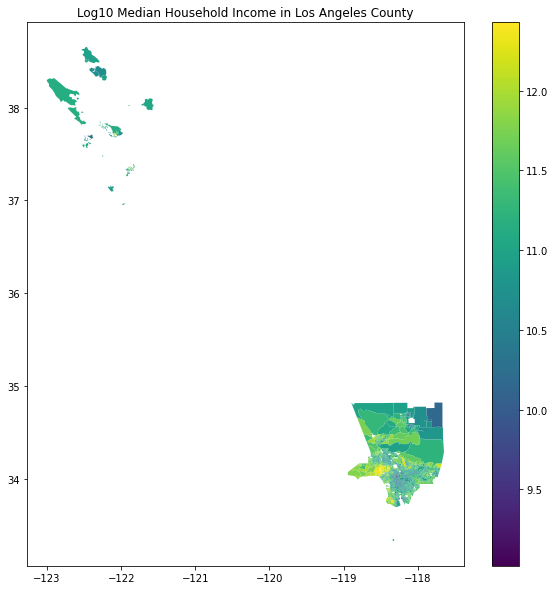

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");

The figure above is the Log10 Median Household Income in Los Angeles County. However, it is hard to see the location and the details. 

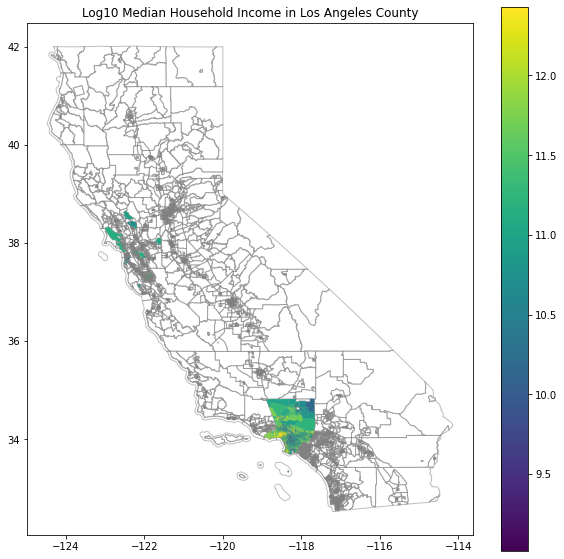

In [ ]:
fig, ax = plt.subplots(figsize=[10, 10])

gla18.plot(color="None", edgecolor='grey', ax=ax, alpha = 0.5)
incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");

I have used California state map as the base map. It could help the reader understand the location of LA county. But it is still hard to see the income distribution. 

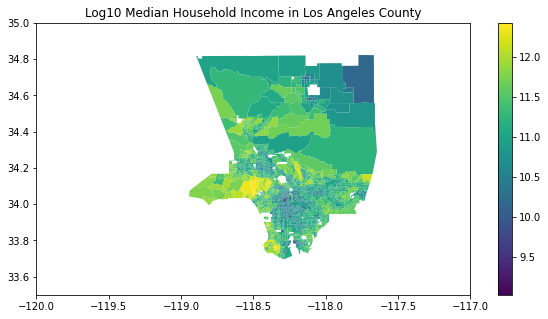

In [ ]:
fig, ax = plt.subplots(figsize=[10, 5])

incomela18.plot(column="income", ax=ax, legend=True);
ax.axis('on');
plt.title("Log10 Median Household Income in Los Angeles County");
ax.set_xlim(-120, -117)
ax.set_ylim(33.5, 35);

I  narrowed the income distribution map and it shows that the northeast of LA county has the lowest median household income, and the southwest of LA county has the highest median household income. 